In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score , normalized_mutual_info_score
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Charger le dataset NG20
ng20 = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
corpus = ng20.data[:2000]

# Prétraitement des données textuelles
stop_words = set(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words='english')  

# Utiliser 'english' au lieu de stop_words
X = vectorizer.fit_transform(corpus)

# Réduction de la dimension avec ACP
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X.toarray())

# Clustering avec k-means sur les données réduites
k = 20  # Vous pouvez ajuster le nombre de clusters selon vos besoins
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Évaluation du clustering (indice de Rand ajusté)
ground_truth_labels = ng20.target[:2000]
ari = adjusted_rand_score(ground_truth_labels, labels)
nmi = normalized_mutual_info_score(ground_truth_labels, labels)
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

Adjusted Rand Index: 0.059522186481681644
Normalized Mutual Information: 0.28109560296315783


In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups

# Fonction pour la réduction de dimension
def dim_red(X, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

# Fonction pour effectuer le clustering avec k-means
def clust(X, k):
    kmeans = KMeans(n_clusters=k)
    return kmeans.fit_predict(X)

# Import des données
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]

# Modèle d'embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# Pipeline avec ACP et k-means
pipeline = make_pipeline(PCA(n_components=20), KMeans(n_clusters=len(set(labels))))

# Ajustement du modèle
pipeline.fit(embeddings)

# Prédiction des clusters
pred = pipeline.predict(embeddings)

# Évaluation des résultats de clustering
nmi_score = normalized_mutual_info_score(pred, labels)
ari_score = adjusted_rand_score(pred, labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125940 sha256=f505b8958b1ddaa1e07461a9496e189fc2045c27bfa67ad41504c170c058a330
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.2.0
    Uninstalling fsspec-2022.2.0:
      Successfully uninstalled fsspec-2022.2.0


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

NMI: 0.41 
ARI: 0.24


In [7]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pipreqs

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=bfb846eea55283f49a3b21a1795260a9847f36a5a8fc9c78af8a181b6ccd4356
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.


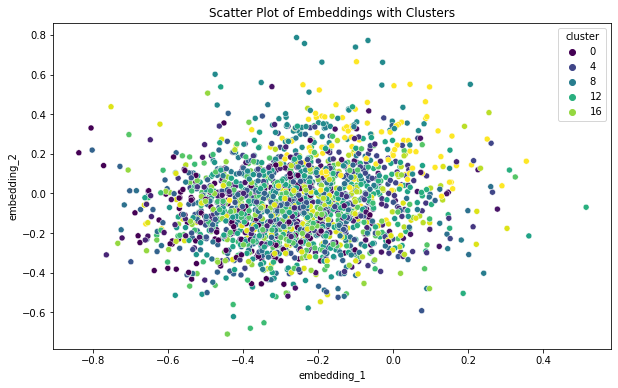

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
import pandas as pd
df = pd.DataFrame({'embedding_1': embeddings[:, 0], 'embedding_2': embeddings[:, 1], 'cluster': pred})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='embedding_1', y='embedding_2', hue='cluster', data=df, palette='viridis')
plt.title('Scatter Plot of Embeddings with Clusters')
plt.show()


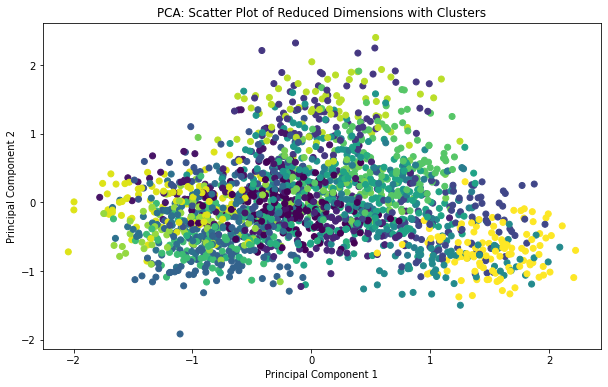

In [16]:
# Assuming you have already defined and fitted the PCA model
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Scatter plot for PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pred, cmap='viridis')
plt.title('PCA: Scatter Plot of Reduced Dimensions with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



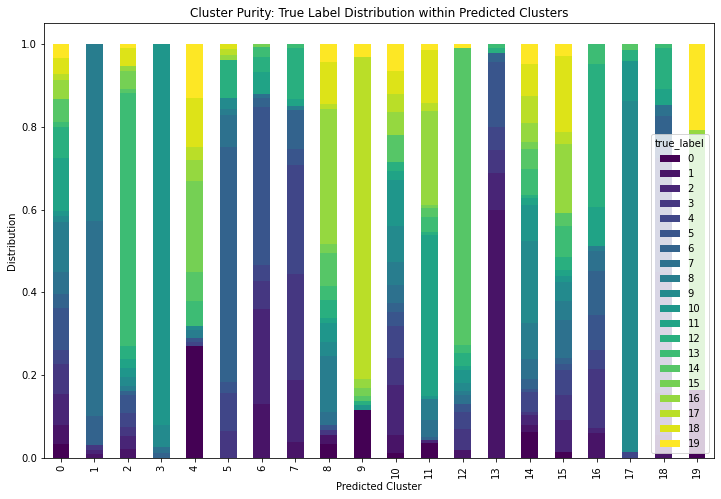

In [17]:
# Create a DataFrame for visualization
df_purity = pd.DataFrame({'true_label': labels, 'cluster': pred})

# Count occurrences of each true label within each cluster
purity_counts = df_purity.groupby(['cluster', 'true_label']).size().unstack().fillna(0)

# Normalize the counts to get the distribution
purity_distribution = purity_counts.div(purity_counts.sum(axis=1), axis=0)

# Bar chart
purity_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Cluster Purity: True Label Distribution within Predicted Clusters')
plt.xlabel('Predicted Cluster')
plt.ylabel('Distribution')
plt.show()


In [ ]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")
from sentence_transformers import SentenceTransformer
print(f"sentence-transformers version: {sentence_transformers.__version__}")
import matplotlib
print(f"matplotlib version: {matplotlib.__version__}")
